In [8]:
%matplotlib inline
%pylab inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys


Populating the interactive namespace from numpy and matplotlib


In [16]:
police_data = pd.read_csv('police_killings.csv', encoding = 'ISO-8859-1')

police_data

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,...,79,15523,20833.0,53596,0.388704,1.0,1.0,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068.0,48552,1.195996,4.0,4.0,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543.0,55909,1.190202,4.0,4.0,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391.0,38310,0.793292,2.0,1.0,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553.0,51667,0.862311,3.0,2.0,18.4,0.174167,0.102692


In [5]:
police_data['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

In [6]:
killing_pct = police_data.groupby('raceethnicity').size().apply(lambda x: float(x) / police_data.groupby('raceethnicity').size().sum()*100)

In [7]:
us_pop = {
    'Asian/Pacific Islander': 14465124, 
    'Black': 37685848,
    'Hispanic/Latino': 50477594,
    'Native American': 2247098,
    'White': 196817552
}

total = sum([i for i in us_pop.values()])
total

301693216

In [8]:
pop_pct = {}
for k,v in  us_pop.items():
    pop_pct[k] = (v / total) * 100

pop_pct

{'Asian/Pacific Islander': 4.7946467579834477,
 'Black': 12.491446940590139,
 'Hispanic/Latino': 16.731431574517075,
 'Native American': 0.74482881312120719,
 'White': 65.237645913788128}

In [9]:
killing_pct

raceethnicity
Asian/Pacific Islander     2.141328
Black                     28.907923
Hispanic/Latino           14.346895
Native American            0.856531
Unknown                    3.211991
White                     50.535332
dtype: float64

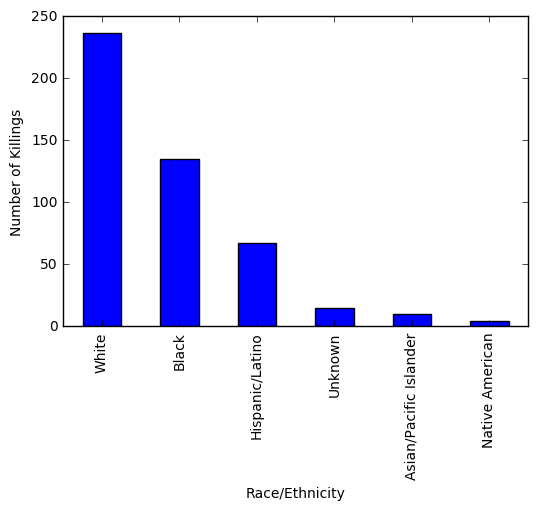

In [10]:
police_data['raceethnicity'].value_counts().plot(kind='bar')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Number of Killings')

In [22]:
police_data = police_data.dropna(how='any')


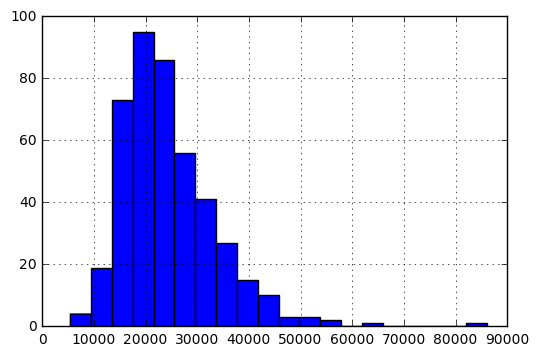

In [23]:
police_data['p_income'] = police_data['p_income'].astype(int)
police_data['p_income'].hist(bins=20)

In [24]:
police_data['p_income'].median()

22245.0

In [25]:
police_data['state'].value_counts()

CA    74
TX    42
FL    28
AZ    24
OK    18
GA    13
NY    13
WA    11
CO    10
MO    10
NJ    10
NC    10
IL    10
MD     9
OH     9
MI     9
LA     9
IN     8
SC     8
VA     8
AL     8
PA     7
OR     7
KY     6
MN     6
TN     6
KS     6
NE     5
MA     5
NM     5
WI     5
MS     4
UT     4
AR     4
HI     4
ID     3
NV     3
MT     2
WV     2
DE     2
IA     2
AK     2
WY     1
DC     1
NH     1
CT     1
ME     1
Name: state, dtype: int64

In [28]:
data_new = police_data.dropna(how='any')

In [32]:
data_new['share_white'] = data_new['share_white'].astype(float)
data_new['share_black'] = data_new['share_black'].astype(float)
data_new['share_hispanic'] = data_new['share_hispanic'].astype(float)

In [33]:
data_new

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23.0,2015.0,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766.0,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2.0,2015.0,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930.0,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14.0,2015.0,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930.0,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11.0,2015.0,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909.0,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19.0,2015.0,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669.0,1.384868,5.0,4.0,1.9,0.063550,0.403954
5,Adam Reinhart,29,Male,White,March,7.0,2015.0,18th St and Palm Ln,Phoenix,AZ,...,79.0,15523,20833.0,53596.0,0.388704,1.0,1.0,58,0.073651,0.102955
6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27.0,2015.0,4000 Union Ave,Bakersfield,CA,...,44.2,25949,58068.0,48552.0,1.195996,4.0,4.0,17.2,0.131461,0.203801
7,Adrian Solis,35,Male,Hispanic/Latino,March,26.0,2015.0,1500 Bayview Ave,Wilmington,CA,...,84.1,25043,66543.0,55909.0,1.190202,4.0,4.0,12.2,0.094347,0.090438
8,Alan Alverson,44,Male,White,January,28.0,2015.0,Pickett Runn Rd,Sunset,TX,...,66.3,16778,30391.0,38310.0,0.793292,2.0,1.0,37.7,0.140833,0.047601
9,Alan James,31,Male,White,February,7.0,2015.0,200 Abbie St SE,Wyoming,MI,...,26.5,22005,44553.0,51667.0,0.862311,3.0,2.0,18.4,0.174167,0.102692


In [39]:
lower_states = data_new.loc[data_new['state'].isin(["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"])]
higher_states = data_new.loc[data_new['state'].isin(["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"])]

In [44]:
print(lower_states['pop'].mean(),
lower_states['county_income'].mean(),
lower_states['share_white'].mean(),
lower_states['share_black'].mean(),
lower_states['share_hispanic'].mean(),
higher_states['pop'].mean(),
higher_states['county_income'].mean(),
higher_states['share_white'].mean(),
higher_states['share_black'].mean(),
higher_states['share_hispanic'].mean(), sep='\n')

4264.833333333333
55083.666666666664
61.3037037037037
20.107407407407408
13.335185185185187
4243.914634146341
48860.70731707317
54.15731707317074
12.23658536585366
21.673170731707312
